In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import pandas as pd
import shutil
import scipy.optimize as op
%matplotlib notebook

In [2]:
#reads the alldata file (as is from rattrap) and returns a temp list with the data in file 
def read_alldata_file(filename):
    temp_list = []
    try:
        file = open(filename, "r")
        start_reading = False
        for line in file:
            line = line.split('\t') # tab separated columns
            if start_reading:
                temp_list.append(np.array(line))
            if "Energy_(eV)" in line:
                # keeping track of data versus headers and comments
                Title = line
                Title[-1] = line[-1].format().replace('\n','')
                start_reading = True
    finally:
        file.close()
    return temp_list

In [3]:
directory = '90C'

In [4]:
file_list = [f for f in os.listdir(directory) if 'alldata' in f]
F = len(file_list)
print(F)
print(file_list)

6
['1m-zncl2-3m-licl-90C2_alldata_0.txt', '1m-zncl2-3m-licl-90C2_alldata_1.txt', '1m-zncl2-3m-licl-90C2_alldata_2.txt', '1m-zncl2-3m-licl-90C2_alldata_3.txt', '1m-zncl2-3m-licl-90C2_alldata_4.txt', '1m-zncl2-3m-licl-90C2_alldata_5.txt']


In [5]:
# Data will be a 3D list that will be [batch number, row, column]
# where the rows and columns are the same from rat trap all data files
Data = []

In [6]:
# read in every alldata file in the given directory
for filename in file_list:
    Data.append(np.array(read_alldata_file(f'{directory}/{filename}'))) 


<IPython.core.display.Javascript object>


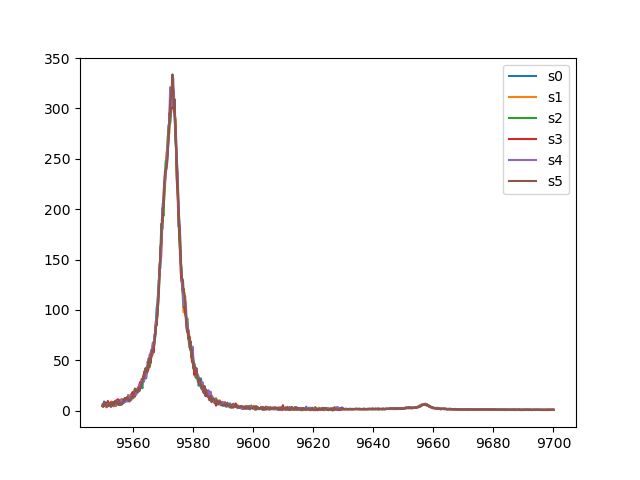

In [7]:
# convert list to array
Data = np.array(Data, dtype=float)
#print(Data)
plt.plot(Data[0,:,0], Data[0,:,8], label = 's0')
plt.plot(Data[1,:,0], Data[1,:,8], label = 's1')
plt.plot(Data[2,:,0], Data[2,:,8], label = 's2')
plt.plot(Data[3,:,0], Data[3,:,8], label = 's3')
plt.plot(Data[4,:,0], Data[4,:,8], label = 's4')
plt.plot(Data[5,:,0], Data[5,:,8], label = 's5')
#plt.plot(Data[6,:,0], Data[6,:,8], label = 's6')


plt.legend()